In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


In [2]:
accidents = pd.read_csv('Accident_Information.csv')
print('Records:', accidents.shape[0], '\nColumns:', accidents.shape[1])
accidents.head()

/var/folders/j6/l85s7t013ms86f7ls_ncs5f00000gn/T/ipykernel_5994/3808499155.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv('Accident_Information.csv')


Records: 2047256 
Columns: 34


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No


In [3]:
vehicles = pd.read_csv('Vehicle_Information.csv', encoding='ISO-8859-1')
print('Records:', vehicles.shape[0], '\nColumns:', vehicles.shape[1])
vehicles.head()

Records: 2177205 
Columns: 24


,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,NaN,NaN,Data missing or out of range,Data missing or out of range,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


In [4]:
pd.set_option('display.max_columns', None)

accidents.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,Daylight,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No


In [5]:
accidents=accidents[['Accident_Index', 'Accident_Severity', 'Date',
       'Day_of_Week', 'Light_Conditions','Number_of_Casualties',
       'Number_of_Vehicles','Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year']]
      

In [6]:
accidents.head()

,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
0,200501BS00001,Serious,2005-01-04,Tuesday,Daylight,1,1,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005
1,200501BS00002,Slight,2005-01-05,Wednesday,Darkness - lights lit,1,1,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005
2,200501BS00003,Slight,2005-01-06,Thursday,Darkness - lights lit,1,2,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005
3,200501BS00004,Slight,2005-01-07,Friday,Daylight,1,1,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005
4,200501BS00005,Slight,2005-01-10,Monday,Darkness - lighting unknown,1,1,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005


In [7]:
accidents['Date']= pd.to_datetime(accidents['Date'], format="%Y-%m-%d")


In [8]:
accidents['Hour']=accidents['Time'].str[0:2]
#converting this to numeric
accidents['Hour']=pd.to_numeric(accidents['Hour'])
#dropping null values for hour
accidents = accidents.dropna(subset=['Hour'])
#setting hour to integer type
accidents['Hour'] = accidents['Hour'].astype('int')


Dividing the hours into 5 sectors
Morning Rush from 5am to 10am
Office Hours from 10am to 3pm (or: 10:00 - 15:00)
Afternoon Rush from 3pm to 7pm (or: 15:00 - 19:00)
Evening from 7pm to 11pm (or: 19:00 - 23:00)
Night from 11pm to 5am (or: 23:00 - 05:00)

In [9]:
def settime(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

In [10]:
accidents['Daytime'] = accidents['Hour'].apply(settime)
accidents[['Time', 'Hour', 'Daytime']].head(8)

,Time,Hour,Daytime
0,17:42,17,afternoon rush (15-19)
1,17:36,17,afternoon rush (15-19)
2,00:15,0,night (23-5)
3,10:35,10,office hours (10-15)
4,21:13,21,evening (19-23)
5,12:40,12,office hours (10-15)
6,20:40,20,evening (19-23)
7,17:35,17,afternoon rush (15-19)


In [11]:
accidents.isna().sum()#check if there are any null values

Accident_Index                      0
Accident_Severity                   0
Date                                0
Day_of_Week                         0
Light_Conditions                    0
Number_of_Casualties                0
Number_of_Vehicles                  0
Road_Surface_Conditions             0
Road_Type                           0
Special_Conditions_at_Site    1994986
Speed_limit                        37
Time                                0
Urban_or_Rural_Area                 0
Weather_Conditions                  0
Year                                0
Hour                                0
Daytime                             0
dtype: int64

In [12]:
accidents.loc[accidents.duplicated()]#check if there are any duplicate values

,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,Hour,Daytime


In [13]:
accidents.head()

,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,Hour,Daytime
0,200501BS00001,Serious,2005-01-04,Tuesday,Daylight,1,1,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,17,afternoon rush (15-19)
1,200501BS00002,Slight,2005-01-05,Wednesday,Darkness - lights lit,1,1,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,17,afternoon rush (15-19)
2,200501BS00003,Slight,2005-01-06,Thursday,Darkness - lights lit,1,2,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,0,night (23-5)
3,200501BS00004,Slight,2005-01-07,Friday,Daylight,1,1,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,10,office hours (10-15)
4,200501BS00005,Slight,2005-01-10,Monday,Darkness - lighting unknown,1,1,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,21,evening (19-23)


Exploratory Data Analysis

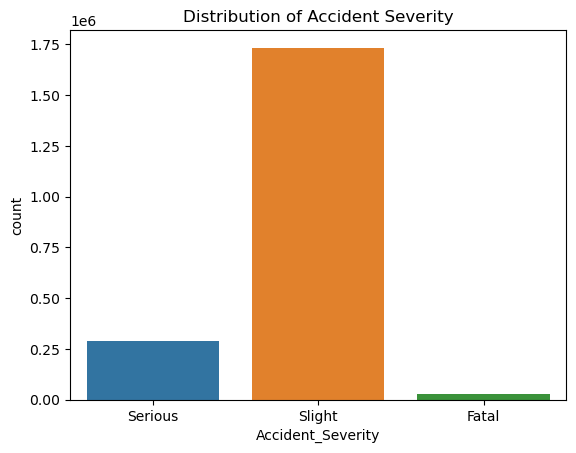

In [14]:
#distribution of accident severity
sns.countplot(x='Accident_Severity', data=accidents)
plt.title('Distribution of Accident Severity')
plt.show()


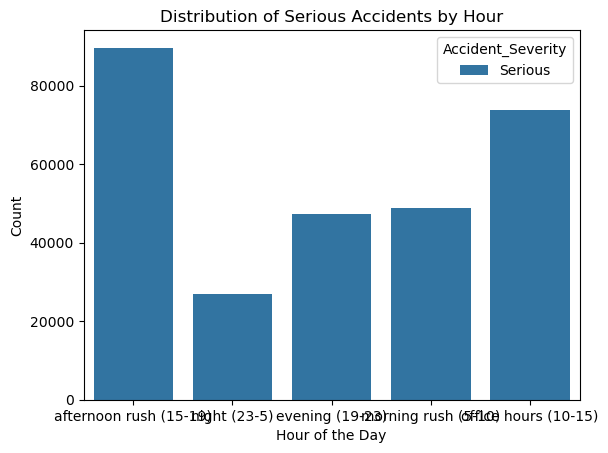

In [15]:
#variation of accident severity at different times of the day
sns.countplot(x='Daytime', hue='Accident_Severity', data=accidents[accidents['Accident_Severity']=='Serious'])
plt.title('Distribution of Serious Accidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()


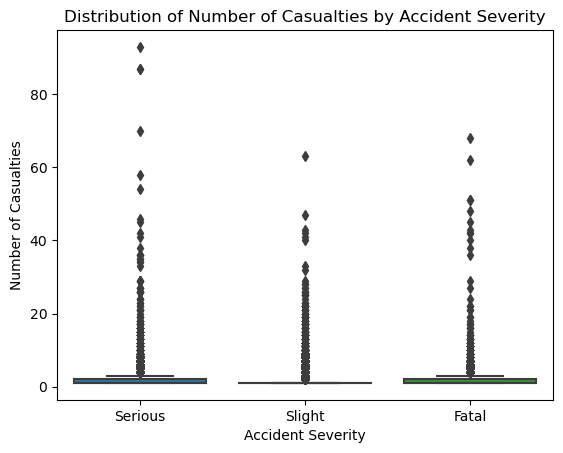

In [16]:
sns.boxplot(x='Accident_Severity', y='Number_of_Casualties', data=accidents)
plt.title('Distribution of Number of Casualties by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Casualties')
plt.show()

In [17]:
accidents['Speed_limit'].unique()

array([30., 40., 50., 20., 60., 70., 10., 15.,  0., nan])

Encoding the Columns
0.1.0=Serious
0.0.1=Slight
1.0.0=Fatal



In [18]:
label_encode_cols = ['Day_of_Week','Accident_Severity','Light_Conditions', 'Road_Surface_Conditions', 'Road_Type','Urban_or_Rural_Area', 'Special_Conditions_at_Site', 'Weather_Conditions', 'Daytime','Speed_limit']
label_encoder = LabelEncoder()
for col in label_encode_cols:
    accidents[col] = label_encoder.fit_transform(accidents[col])
accidents.head(10)

,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,Hour,Daytime
0,200501BS00001,1,2005-01-04,5,5,1,1,5,4,8,4,17:42,2,6,2005,17,0
1,200501BS00002,2,2005-01-05,6,1,1,1,1,1,8,4,17:36,2,2,2005,17,0
2,200501BS00003,2,2005-01-06,4,1,1,2,1,4,8,4,00:15,2,2,2005,0,3
3,200501BS00004,2,2005-01-07,0,5,1,1,1,4,8,4,10:35,2,2,2005,10,4
4,200501BS00005,2,2005-01-10,1,0,1,1,5,4,8,4,21:13,2,2,2005,21,1
5,200501BS00006,2,2005-01-11,5,5,1,2,5,4,4,4,12:40,2,6,2005,12,4
6,200501BS00007,2,2005-01-13,4,1,1,2,1,4,8,4,20:40,2,2,2005,20,1
7,200501BS00009,2,2005-01-14,0,5,2,1,1,1,8,4,17:35,2,2,2005,17,0
8,200501BS00010,2,2005-01-15,2,1,2,2,1,4,8,4,22:43,2,2,2005,22,1
9,200501BS00011,2,2005-01-15,2,5,5,2,1,4,8,4,16:00,2,2,2005,16,0


In [19]:
accidents=accidents.drop('Accident_Index',axis=1)
accidents=accidents.drop('Date',axis=1)
accidents=accidents.drop('Time',axis=1)
accidents=accidents.drop('Year',axis=1)
accidents=accidents.drop('Hour',axis=1)

In [20]:

X = accidents.drop('Accident_Severity', axis=1)
y = accidents['Accident_Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

feature_importances_rf = pd.Series(model_rf.feature_importances_, index=X.columns)
print(feature_importances_rf.sort_values(ascending=False))


Day_of_Week                   0.207981
Number_of_Vehicles            0.152194
Daytime                       0.101576
Number_of_Casualties          0.094966
Speed_limit                   0.094024
Weather_Conditions            0.090954
Road_Type                     0.063448
Light_Conditions              0.059298
Road_Surface_Conditions       0.057771
Special_Conditions_at_Site    0.047225
Urban_or_Rural_Area           0.030563
dtype: float64


In [24]:
accidents=accidents.drop('Road_Type',axis=1)
accidents=accidents.drop('Urban_or_Rural_Area',axis=1)
accidents=accidents.drop('Light_Conditions',axis=1)
accidents=accidents.drop('Road_Surface_Conditions',axis=1)
accidents=accidents.drop('Special_Conditions_at_Site',axis=1)

In [25]:
accidents.head()

,Accident_Severity,Day_of_Week,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Weather_Conditions,Daytime
0,1,5,1,1,4,6,0
1,2,6,1,1,4,2,0
2,2,4,1,2,4,2,3
3,2,0,1,1,4,2,4
4,2,1,1,1,4,2,1


In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

# Logistic Regression
model_lr = LogisticRegression()
accuracy_lr, precision_lr, recall_lr, f1_lr = train_and_evaluate(model_lr, X_train_scaled, y_train, X_test_scaled, y_test)
print(f'Logistic Regression Accuracy: {accuracy_lr}')
print(f'Logistic Regression Precision: {precision_lr}')
print(f'Logistic Regression Recall: {recall_lr}')
print(f'Logistic Regression F1 Score: {f1_lr}')

# Decision Trees
model_dt = DecisionTreeClassifier()
accuracy_dt, precision_dt, recall_dt, f1_dt = train_and_evaluate(model_dt, X_train, y_train, X_test, y_test)
print(f'Decision Trees Accuracy: {accuracy_dt}')
print(f'Decision Trees Precision: {precision_dt}')
print(f'Decision Trees Recall: {recall_dt}')
print(f'Decision Trees F1 Score: {f1_dt}')

# Random Forest
model_rf = RandomForestClassifier()
accuracy_rf, precision_rf, recall_rf, f1_rf = train_and_evaluate(model_rf, X_train, y_train, X_test, y_test)
print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Precision: {precision_rf}')
print(f'Random Forest Recall: {recall_rf}')
print(f'Random Forest F1 Score: {f1_rf}')


Logistic Regression Accuracy: 0.8473963167407552
Logistic Regression Precision: 0.7725116386214168
Logistic Regression Recall: 0.8473963167407552
Logistic Regression F1 Score: 0.7777012484182363
Decision Trees Accuracy: 0.8323140051780568
Decision Trees Precision: 0.7488671177144179
Decision Trees Recall: 0.8323140051780568
Decision Trees F1 Score: 0.7783178221412099
Random Forest Accuracy: 0.8414708612183088
Random Forest Precision: 0.7536575836867774
Random Forest Recall: 0.8414708612183088
Random Forest F1 Score: 0.7797651670599441
